In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Gradient Descent
gradient descent 방법을 적용하여 다음 함수의 최저점을 구하여라.$$ f(x) = \frac{1}{2}x^4 -3 x^3 $$

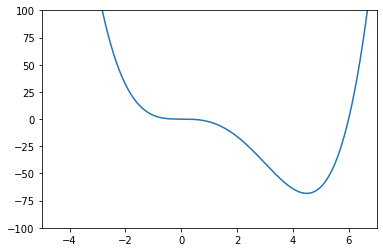

In [2]:
x = np.arange(-10,10,0.01)
def f(x):
    return 0.5*x**4 - 3*x**3
plt.ylim(-100,100)
plt.xlim(-5,7)
plt.plot(x,f(x))

In [3]:
x = 6
x_old = 0
eps = 0.01
precision = 0.00001

def fp(x):
    return 2*(x**3)-9*(x**2)

In [4]:
while (abs(x - x_old)>precision):
    x_old = x
    x = x_old - eps*fp(x_old)
    
x

4.50000961481209

# Diabetes (regression)
다음의 당뇨 데이터를 회귀 분석하여라. 나이, BMI, 혈압, Y (당뇨병 진행 정도) 데이터를 이용하여라.

 1.sklearn을 이용하지 않고 (자신의 코드로)
 
 2.sklearn을 이용해서

In [5]:
from sklearn import datasets

In [6]:
diabetes=datasets.load_diabetes()

In [7]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [8]:
diabetes.DESCR

'.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - age     age in years\n      - sex\n      - bmi     body mass index\n      - bp      average blood pressure\n      - s1      tc, T-Cells (a type of white blood cells)\n      - s2      ldl, low-density lipoproteins\n      - s3      hdl, high-density lipoproteins\n      - s4      tch, thyroid stimulating hormone\n      - s5      ltg, lamotrigine\n      - s6      glu, blood sugar level\n\nNo

In [9]:
X_age=diabetes.data[:,0] # 나이
X_bmi=diabetes.data[:,2] # BMI
X_p=diabetes.data[:,3] # 혈압
Y = diabetes.target

Text(0.5, 1.0, 'bp')

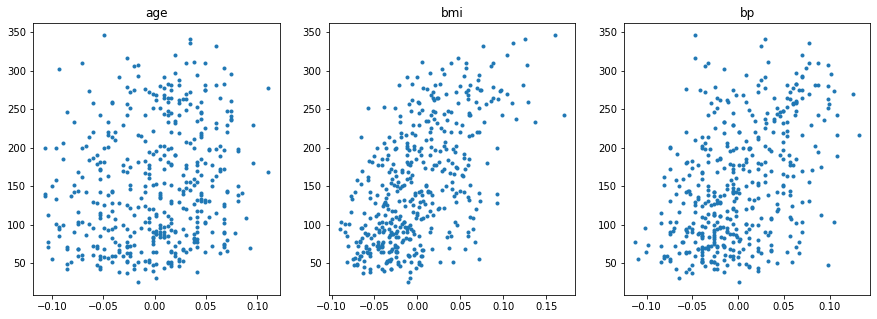

In [10]:
plt.figure(figsize=(15,5))

plt.subplot(131)
plt.plot(X_age, Y, '.')
plt.title('age')

plt.subplot(132)
plt.plot(X_bmi, Y, '.')
plt.title('bmi')

plt.subplot(133)
plt.plot(X_p, Y, '.')
plt.title('bp')

# 1. sklearn이용 X

In [11]:
def y_hat(a,b,x):
    return a*x+b

def MSE(a,b,x):
    return np.mean((y_hat(a,b,x)-Y)**2)

In [12]:
a,b,x= 1,1,X_age
eps=0.1
for i in range(100000):

    if MSE(a+eps,b,x)>MSE(a-eps,b,x):
        a-=eps
    else: a+=eps

    if MSE(a,b+eps,x)>MSE(a,b-eps,x):
        b-=eps
    else: b+=eps

a,b

(304.20000000000067, 152.19999999999564)

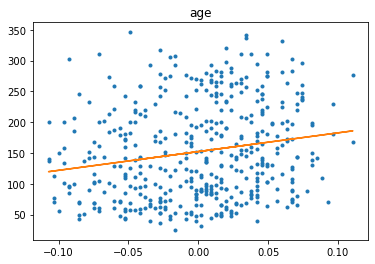

In [13]:
plt.plot(X_age, Y, '.')
plt.title('age')
plt.plot(X_age,y_hat(a,b,x))

In [14]:
def y_hat(c,d,x):
    return c*x+d

def MSE(c,d,x):
    return np.mean((y_hat(c,d,x)-Y)**2)

In [15]:
c,d,x= 1,1,X_bmi
eps=0.1
for i in range(100000):

    if MSE(c+eps,d,x)>MSE(c-eps,d,x):
        c-=eps
    else: c+=eps

    if MSE(c,d+eps,x)>MSE(c,d-eps,x):
        d-=eps
    else: d+=eps

c,d

(949.4000000001473, 152.19999999999564)

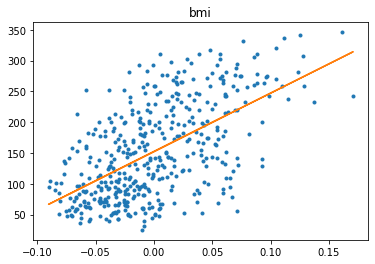

In [16]:
plt.plot(X_bmi, Y, '.')
plt.title('bmi')
plt.plot(X_bmi,y_hat(c,d,x))

In [17]:
def y_hat(e,f,x):
    return e*x+f

def MSE(e,f,x):
    return np.mean((y_hat(e,f,x)-Y)**2)

In [18]:
e,f,x= 1,1,X_p
eps=0.1
for i in range(100000):

    if MSE(e+eps,f,x)>MSE(e-eps,f,x):
        e-=eps
    else: e+=eps

    if MSE(e,f+eps,x)>MSE(e,f-eps,x):
        f-=eps
    else: f+=eps

e,f

(714.800000000094, 152.19999999999564)

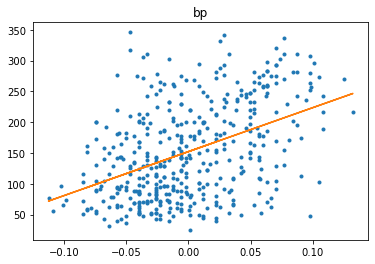

In [19]:
plt.plot(X_p, Y, '.')
plt.title('bp')
plt.plot(X_p,y_hat(e,f,x))

# 2. sklearn 이용

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
L=[X_age,X_bmi,X_p]
l=['age','bmi','dp']
for j,i in enumerate(L):
    f= LinearRegression()
    f.fit(i.reshape(-1,1),Y)
    print(f' {l[j]}\n기울기: {f.coef_[0]} \n 절편: {f.intercept_} \n ')

 age
기울기: 304.18307452829475 
 절편: 152.13348416289605 
 
 bmi
기울기: 949.4352603839491 
 절편: 152.1334841628967 
 
 dp
기울기: 714.7416437042881 
 절편: 152.13348416289585 
 


Text(0.5, 1.0, 'dp')

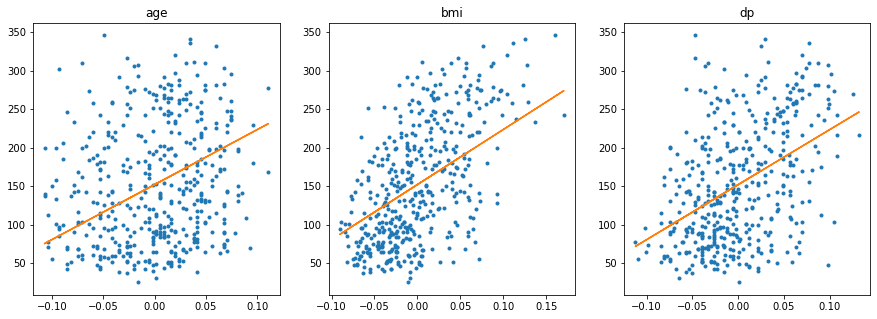

In [22]:
plt.figure(figsize=(15,5))

plt.subplot(131)
plt.plot(X_age,Y,".")
plt.plot(X_age,f.predict(X_age.reshape(-1,1)))
plt.title("age")

plt.subplot(132)
plt.plot(X_bmi,Y,".")
plt.plot(X_bmi,f.predict(X_bmi.reshape(-1,1)))
plt.title("bmi")

plt.subplot(133)
plt.plot(X_p,Y,".")
plt.plot(X_p,f.predict(X_p.reshape(-1,1)))
plt.title("dp")